<a href="https://colab.research.google.com/github/sooo19/A-study-of-the-data-generation-model-of-the-Folk-Painting-source-data/blob/main/Show_and_Tell(Neural_Image_Captioning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Show and Tell
https://github.com/ndb796/Deep-Learning-Paper-Review-and-Practice

code_practices > Neural_Image_Captioning_(NIC)_Using_ResNet_101


*   Show and Tell: A Neural Image Caption Generator (CVPR 2015)
*   CNN 아키텍처로 ResNet-101을 사용합니다.
*   학습용 데이터셋: Flickr8k
*   참고한 소스코드: yunjey







**Download Flickr8k dataset**

Flickr8k 데이터셋 다운로드 및 압축 해제



In [1]:
!wget https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EXVy7_7pF5FIsPp6WfXXfWgBNfUKx8N1VrTisN8FbGYG9w?download=1 -O Flickr8k_dataset.zip

--2021-11-09 01:00:09--  https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EXVy7_7pF5FIsPp6WfXXfWgBNfUKx8N1VrTisN8FbGYG9w?download=1
Resolving postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)... 52.105.209.27
Connecting to postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)|52.105.209.27|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/dongbinna_postech_ac_kr/Documents/Research/datasets/Flickr8k_dataset.zip [following]
--2021-11-09 01:00:10--  https://postechackr-my.sharepoint.com/personal/dongbinna_postech_ac_kr/Documents/Research/datasets/Flickr8k_dataset.zip
Reusing existing connection to postechackr-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1112971163 (1.0G) [application/x-zip-compressed]
Saving to: ‘Flickr8k_dataset.zip’

Flickr8k_dataset.zi 100%[===================>]   1.04G  16.3MB/s    in 76s     

2021-11-09 01:01:27 (13.9 MB/s) - ‘Flickr8k_dataset.zip’

In [2]:
%%capture
!unzip Flickr8k_dataset.zip -d ./Flickr8k_dataset

**라이브러리 설치**

BLEU Score 계산을 위한 라이브러리를 설치


In [3]:
!pip install torchtext==0.6.0

     |████████████████████████████████| 64 kB 1.8 MB/s 
     |████████████████████████████████| 1.2 MB 11.1 MB/s 
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.10.0
    Uninstalling torchtext-0.10.0:
      Successfully uninstalled torchtext-0.10.0


**이미지 크기 조정(Resize)**
      
데이터셋에 포함된 모든 이미지의 크기를 조정



In [4]:
import os
from PIL import Image

image_dir = "./Flickr8k_dataset/Images" # 원본 이미지 파일 경로
train_image_dir = "./resized_train/images" # 크기가 조정된 이미지가 담길 경로 (학습)
val_image_dir = "./resized_val/images" # 크기가 조정된 이미지가 담길 경로 (평가)
test_image_dir = "./resized_test/images" # 크기가 조정된 이미지가 담길 경로 (테스트)
size = [256, 256] # 조정될 이미지 크기


def resize_image(image, size):
    # 이미지를 특정 크기로 조정
    return image.resize(size, Image.ANTIALIAS)

# image_dir 내부에 있는 모든 이미지의 크기를 바꾸어 결과 폴더로 옮기기
if not os.path.exists(train_image_dir):
    os.makedirs(train_image_dir)
if not os.path.exists(val_image_dir):
    os.makedirs(val_image_dir)
if not os.path.exists(test_image_dir):
    os.makedirs(test_image_dir)

images = sorted(os.listdir(image_dir)) # 이미지와 캡션 모두 파일 이름별로 정렬해서 매칭
num_images = len(images)
num_train_images = 6000 # 6000개는 학습용 데이터로 이용(train 6000)
num_val_images = 1000 # 1000개는 평가용 데이터로 이용(val 1000, test 1000)

for i, image in enumerate(images):
    if (i + 1) <= num_train_images:
        output_dir = train_image_dir
    elif (i + 1) <= num_train_images + num_val_images:
        output_dir = val_image_dir
    else:
        output_dir = test_image_dir
    with open(os.path.join(image_dir, image), 'rb+') as f:
        with Image.open(f) as img:
            img = resize_image(img, size)
            img.save(os.path.join(output_dir, image), img.format)
    if (i + 1) % 500 == 0:
        print(f"[{i + 1}/{num_images}] Resized the images and saved into '{output_dir}'")

[500/8091] Resized the images and saved into './resized_train/images'
[1000/8091] Resized the images and saved into './resized_train/images'
[1500/8091] Resized the images and saved into './resized_train/images'
[2000/8091] Resized the images and saved into './resized_train/images'
[2500/8091] Resized the images and saved into './resized_train/images'
[3000/8091] Resized the images and saved into './resized_train/images'
[3500/8091] Resized the images and saved into './resized_train/images'
[4000/8091] Resized the images and saved into './resized_train/images'
[4500/8091] Resized the images and saved into './resized_train/images'
[5000/8091] Resized the images and saved into './resized_train/images'
[5500/8091] Resized the images and saved into './resized_train/images'
[6000/8091] Resized the images and saved into './resized_train/images'
[6500/8091] Resized the images and saved into './resized_val/images'
[7000/8091] Resized the images and saved into './resized_val/images'
[7500/8091]



**캡션을 이용해 Vocabulary 만들기**

*   현재 Flickr8k_dataset에는 총 8,091개의 이미지가 포함되어 있다.
*   이미지마다 5개의 캡션이 붙어 있으므로 총 40,455(8,091*5)개의 문장이 존재한다.





In [5]:
import pickle
import nltk
from collections import Counter

nltk.download('punkt')

caption_path = "./Flickr8k_dataset/captions.txt" # 원본 캡션(caption) 파일
vocab_path = "./vocab.pkl" # 단어 사전 결과 파일
word_threshold = 4 # 최소 단어 등장 횟수(4번 이상 단어가 등장할 때만 vocabulary)
train_caption_path = "./resized_train/captions.txt" # 크기가 조정된 이미지의 캡션(caption)이 담길 경로 (학습)
val_caption_path = "./resized_val/captions.txt" # 크기가 조정된 이미지의 캡션(caption)이 담길 경로 (평가)
test_caption_path = "./resized_test/captions.txt" # 크기가 조정된 이미지의 캡션(caption)이 담길 경로 (테스트)


class Vocabulary(object):
    """Simple vocabulary wrapper."""
    def __init__(self):
        self.word2idx = {} #단어가 몇 번째 인덱스에 해당하는지 구하도록 만든다.
        self.idx2word = {}
        self.idx = 0

    def add_word(self, word):
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            self.idx += 1

    def __call__(self, word):
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

counter = Counter()

with open(caption_path, "r") as f:
    lines = sorted(f.readlines()[1:])
    for i in range(len(lines)):
        line = lines[i]
        if (i + 1) <= num_train_images * 5: # 이미지당 캡션이 5개씩 존재
            output_caption = train_caption_path
        elif (i + 1) <= (num_train_images + num_val_images) * 5:
            output_caption = val_caption_path
        else:
            output_caption = test_caption_path
        index = line.find(",") # 캡션(caption) 문자열의 시작점 찾기
        caption = line[index + 1:] # 캡션(caption) 문자열 기록
        tokens = nltk.tokenize.word_tokenize(caption.lower()) # 문자열 토큰화
        counter.update(tokens) # 각 토큰의 개수 세기
        with open(output_caption, "a") as output_caption_f:
            output_caption_f.write(line)

# 단어의 빈도수가 특정 임계치(threshold) 이상인 경우에만 사용
words = [word for word, cnt in counter.items() if cnt >= word_threshold]

# Vocabulary 객체 생성
vocab = Vocabulary()
vocab.add_word('<pad>') #패딩
vocab.add_word('<start>')
vocab.add_word('<end>')
vocab.add_word('<unk>') # unknown 토큰

# Vocabulary 객체에 모든 단어를 담기
for word in words:
    vocab.add_word(word)

# Vocabulary 파일 저장
with open(vocab_path, 'wb') as f:
    pickle.dump(vocab, f)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
# 학습(train) 데이터셋의 캡션 수
!wc -l ./resized_train/captions.txt
# 평가(val) 데이터셋의 캡션 수
!wc -l ./resized_val/captions.txt
# 테스트(test) 데이터셋의 캡션 수
!wc -l ./resized_test/captions.txt

30000 ./resized_train/captions.txt
5000 ./resized_val/captions.txt
5455 ./resized_test/captions.txt


**커스텀 데이터셋 클래스 정의**

Flickr8kDataset 클래스를 정의한다.



In [7]:
import torch.utils.data as data


# Flickr8k 데이터셋 클래스 정의
class Flickr8kDataset(data.Dataset):
    def __init__(self, root, captions, vocab, transform=None):
        self.root = root # 이미지가 존재하는 경로
        with open(captions, "r") as f:
             lines = f.readlines()
             self.captions = [] # 캡션(caption) 정보를 담을 리스트
             for line in lines: # 첫 번째 줄부터 바로 캡션 정보 존재
                index = line.find(",") # 캡션(caption) 문자열의 시작점 찾기
                path = line[:index] # 이미지 파일 이름
                caption = line[index + 1:] # 캡션(caption) 문자열 기록
                self.captions.append((path, caption))
        self.vocab = vocab
        self.transform = transform

    # 이미지와 캡션(caption)을 하나씩 꺼내는 메서드
    def __getitem__(self, index):
        vocab = self.vocab
        path = self.captions[index][0]
        caption = self.captions[index][1]

        image = Image.open(os.path.join(self.root, path)).convert('RGB')
        if self.transform is not None:
            image = self.transform(image)

        # 캡션(caption) 문자열을 토큰 형태로 바꾸기
        tokens = nltk.tokenize.word_tokenize(str(caption).lower())
        caption = []
        caption.append(vocab('<start>'))
        caption.extend([vocab(token) for token in tokens])
        caption.append(vocab('<end>'))
        target = torch.Tensor(caption)
        return image, target

    def __len__(self):
        return len(self.captions)

In [8]:
# 이미지와 캡션(caption)으로 구성된 튜플을 배치(batch)로 만들기
def collate_fn(data):
    """
    [입력]
    * data: list of tuple (image, caption). 
        * image: torch tensor of shape (3, 256, 256).
        * caption: torch tensor of shape (?); variable length.
    [출력]
    * images: torch tensor of shape (batch_size, 3, 256, 256).
    * targets: torch tensor of shape (batch_size, padded_length).
    * lengths: list; valid length for each padded caption.
    """
    # Caption 길이로 각 데이터를 내림차순 정렬
    data.sort(key=lambda x: len(x[1]), reverse=True)
    images, captions = zip(*data)

    # 리스트 형태의 이미지들을 텐서 하나로 합치기(데이터 개수, 3, 256, 256)
    images = torch.stack(images, 0)

    # 리스트 형태의 캡션들을 텐서 하나로 합치기(데이터 개수, 문장 내 최대 토큰 개수)
    lengths = [len(caption) for caption in captions]
    targets = torch.zeros(len(captions), max(lengths)).long()
    # 하나씩 캡션을 확인하며 앞 부분의 내용을 패딩이 아닌 원래 토큰으로 채우기
    for i, cap in enumerate(captions):
        end = lengths[i]
        targets[i, :end] = cap[:end]
    return images, targets, lengths

def collate_fn_test(data):
    # 기존 순서를 그대로 사용 (차례대로 5개씩 같은 이미지를 표현)
    images, captions = zip(*data)

    # 리스트 형태의 이미지들을 텐서 하나로 합치기(데이터 개수, 3, 256, 256)
    images = torch.stack(images, 0)

    # 리스트 형태의 캡션들을 텐서 하나로 합치기(데이터 개수, 문장 내 최대 토큰 개수)
    lengths = [len(caption) for caption in captions]
    targets = torch.zeros(len(captions), max(lengths)).long()
    # 하나씩 캡션을 확인하며 앞 부분의 내용을 패딩이 아닌 원래 토큰으로 채우기
    for i, cap in enumerate(captions):
        end = lengths[i]
        targets[i, :end] = cap[:end]
    return images, targets, lengths

# 커스텀 Flickr8k 데이터셋을 위한 DataLoader 객체 반환
def get_loader(root, captions, vocab, transform, batch_size, shuffle, num_workers, testing):
    flickr8k = Flickr8kDataset(root=root, captions=captions, vocab=vocab, transform=transform)
    # This will return (images, captions, lengths) for each iteration.
    # images: a tensor of shape (batch_size, 3, 224, 224).
    # captions: a tensor of shape (batch_size, padded_length).
    # lengths: a list indicating valid length for each caption. length is (batch_size).
    if not testing:
        data_loader = torch.utils.data.DataLoader(dataset=flickr8k, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers, collate_fn=collate_fn)
    else:
        data_loader = torch.utils.data.DataLoader(dataset=flickr8k, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers, collate_fn=collate_fn_test)
    return data_loader

**모델 정의**

*   학습을 위한 Encoder 및 Decoder 모델 정의
*   사전 학습된 (pre-trained) ResNet-101 모델을 CNN 모델로 사용



In [9]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.nn.utils.rnn import pack_padded_sequence


class EncoderCNN(nn.Module): #인코더. 이미지를 입력받아 CNN 네트워크를 거쳐 feature을 뽑아낸다.
    def __init__(self, embed_size):
        # 사전 학습된(pre-trained) ResNet-101을 불러와 FC 레이어를 교체
        super(EncoderCNN, self).__init__()
        resnet = models.resnet101(pretrained=True)
        modules = list(resnet.children())[:-1] # 마지막 FC 레이어를 제거
        self.resnet = nn.Sequential(*modules)
        self.linear = nn.Linear(resnet.fc.in_features, embed_size) # 결과(output) 차원을 임베딩 차원으로 변경
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)

    def forward(self, images):
        # 입력 이미지에서 특징 벡터(feature vectors)
        with torch.no_grad(): # 네트워크의 앞 부분은 변경되지 않도록 하기
            features = self.resnet(images)
        features = features.reshape(features.size(0), -1)
        features = self.bn(self.linear(features)) #feature는 벡터 형식으로 추출됨.
        return features


class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers, max_seq_length=20):
        # 하이퍼 파라미터(hyper-parameters) 설정 및 레이어 생성
        super(DecoderRNN, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seg_length = max_seq_length

    def forward(self, features, captions, lengths):
        # 이미지 특징 벡터(feature vectors)로부터 캡션(caption) 생성
        embeddings = self.embed(captions)
        embeddings = torch.cat((features.unsqueeze(1), embeddings), 1) # 이미지 특징과 임베딩 연결
        packed = pack_padded_sequence(embeddings, lengths, batch_first=True) # 패딩을 넣어 차원 맞추기
        hiddens, _ = self.lstm(packed) # 다음 hidden state 구하기
        outputs = self.linear(hiddens[0])
        print(outputs) # 추가!!
        return outputs

    def sample(self, features, states=None):
        # 간단히 그리디(greedy) 탐색으로 캡션(caption) 생성하기
        sampled_indexes = []
        inputs = features.unsqueeze(1)
        for i in range(self.max_seg_length):
            hiddens, states = self.lstm(inputs, states) # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1)) # outputs: (batch_size, vocab_size)
            _, predicted = outputs.max(1) # predicted: (batch_size)
            sampled_indexes.append(predicted)
            inputs = self.embed(predicted) # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1) # inputs: (batch_size, 1, embed_size)
        sampled_indexes = torch.stack(sampled_indexes, 1) # sampled_indexes: (batch_size, max_seq_length)
        return sampled_indexes

**학습 및 평가 준비**

*   학습 및 평가를 준비한다.


In [10]:
import torch
from torch.nn.utils.rnn import pack_padded_sequence
from torchvision import transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_path = "models/" # 학습된 모델이 저장될 경로
crop_size = 224 # 랜덤하게 잘라낼 이미지 크기
vocab_path = "./vocab.pkl" # 전처리된 Vocabulary 파일 경로

# 모델 디렉토리 만들기
if not os.path.exists(model_path):
    os.makedirs(model_path)

# Vocabulary 파일 불러오기
with open(vocab_path, 'rb') as f:
    vocab = pickle.load(f)

# 사전 학습된(pre-trained) ResNet에 적용된 전처리 및 정규화 파라미터를 그대로 사용합니다.
train_transform = transforms.Compose([ 
    transforms.RandomCrop(crop_size),
    transforms.RandomHorizontalFlip(), 
    transforms.ToTensor(), 
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

val_transform = transforms.Compose([ 
    transforms.Resize(crop_size), 
    transforms.ToTensor(), 
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

test_transform = transforms.Compose([ 
    transforms.Resize(crop_size), 
    transforms.ToTensor(), 
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

batch_size = 128
num_workers = 2

# 데이터 로더(data loader) 선언
train_data_loader = get_loader(train_image_dir, train_caption_path, vocab, train_transform, batch_size, shuffle=True, num_workers=num_workers, testing=False) 
val_data_loader = get_loader(val_image_dir, val_caption_path, vocab, val_transform, batch_size, shuffle=False, num_workers=num_workers, testing=False)
test_data_loader = get_loader(test_image_dir, test_caption_path, vocab, test_transform, batch_size, shuffle=False, num_workers=num_workers, testing=True)

In [11]:
# 모델 하이퍼 파라미터 설정
embed_size = 256 # 임베딩(embedding) 차원
hidden_size = 512 # LSTM hidden states 차원
num_layers = 1 # LSTM의 레이어 개수

# 모델 객체 선언
encoder = EncoderCNN(embed_size).to(device)
decoder = DecoderRNN(embed_size, hidden_size, len(vocab), num_layers).to(device)

num_epochs = 5
learning_rate = 0.001

log_step = 20 # 로그를 출력할 스텝(step)
save_step = 1000 # 학습된 모델을 저장할 스텝(step)

# 손실(loss) 및 최적화 함수 선언
criterion = nn.CrossEntropyLoss()
params = list(decoder.parameters()) + list(encoder.linear.parameters()) + list(encoder.bn.parameters())
optimizer = torch.optim.Adam(params, lr=learning_rate)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

**학습 진행 (Training)**

30분 29초 소요

In [12]:
import time
import numpy as np

start_time = time.time() # 전체 학습 시간 측정

# 모델 학습 진행
for epoch in range(num_epochs):

    # 먼저 학습 진행하기
    print("[ Training ]")
    total_loss = 0
    total_count = 0
    total_step = len(train_data_loader)
    for i, (images, captions, lengths) in enumerate(train_data_loader):
        images = images.to(device)
        captions = captions.to(device)
        targets = pack_padded_sequence(captions, lengths, batch_first=True)[0]

        # 순전파(forward), 역전파(backward) 및 학습 진행
        features = encoder(images)
        outputs = decoder(features, captions, lengths)
        loss = criterion(outputs, targets)
        decoder.zero_grad()
        encoder.zero_grad()
        loss.backward()
        optimizer.step()

        # 손실(loss) 값 계산
        total_loss += loss.item()
        total_count += images.shape[0]

        # 로그(log) 정보 출력
        if i % log_step == 0:
            print('Epoch [{}/{}], Step [{}/{}], Average Loss: {:.4f}, Perplexity: {:5.4f}, Elapsed time: {:.4f}s'
                  .format(epoch, num_epochs, i, total_step, total_loss / total_count, np.exp(loss.item()), time.time() - start_time))

    # 모델 파일 저장하기
    torch.save(decoder.state_dict(), os.path.join(model_path, f'decoder-{epoch + 1}.ckpt'))
    torch.save(encoder.state_dict(), os.path.join(model_path, f'encoder-{epoch + 1}.ckpt'))
    print(f"Model saved: {os.path.join(model_path, f'decoder-{epoch + 1}.ckpt')}")
    print(f"Model saved: {os.path.join(model_path, f'encoder-{epoch + 1}.ckpt')}")

    # 학습 이후에 평가 진행하기
    print("[ Validation ]")
    total_loss = 0
    total_count = 0
    total_step = len(val_data_loader)
    with torch.no_grad():
        for i, (images, captions, lengths) in enumerate(val_data_loader):
            images = images.to(device)
            captions = captions.to(device)
            targets = pack_padded_sequence(captions, lengths, batch_first=True)[0]

            # 순전파(forward) 진행
            features = encoder(images)
            outputs = decoder(features, captions, lengths)
            loss = criterion(outputs, targets)
  
            # 손실(loss) 값 계산
            total_loss += loss.item()
            total_count += images.shape[0]

            # 로그(log) 정보 출력
            if i % log_step == 0:
                print('Epoch [{}/{}], Step [{}/{}], Average Loss: {:.4f}, Perplexity: {:5.4f}, Elapsed time: {:.4f}s'
                      .format(epoch, num_epochs, i, total_step, total_loss / total_count, np.exp(loss.item()), time.time() - start_time))

[ Training ]


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
       device='cuda:0', grad_fn=<AddmmBackward>)
tensor([[-2.3480, 14.7600,  0.1429,  ..., -2.5602, -1.9871, -2.5002],
        [-0.9777, 14.1993, -0.0853,  ..., -1.2550, -1.2091, -1.3261],
        [-2.5493, 10.9592,  0.8359,  ..., -2.7772, -2.1659, -2.6897],
        ...,
        [-6.4937, -1.8483, 12.1996,  ..., -5.9980, -6.9650, -6.1275],
        [-6.8736, -2.6713,  6.2525,  ..., -7.2044, -7.1886, -6.7279],
        [-7.3973,  0.9329, 13.7250,  ..., -7.1647, -7.5761, -6.9699]],
       device='cuda:0', grad_fn=<AddmmBackward>)
tensor([[-1.4896, 15.4380, -0.7882,  ..., -1.8453, -1.6504, -1.4719],
        [-0.6638, 12.2705, -0.2729,  ..., -0.5419, -0.8644, -0.6569],
        [-1.5287, 14.4137,  0.1610,  ..., -1.6667, -1.5386, -1.5100],
        ...,
        [-7.2973, -1.8252,  7.2520,  ..., -7.4431, -7.8936, -7.2114],
        [-7.9833,  1.4439, 11.5299,  ..., -7.7787, -8.0367, -7.3296],
        [-6.4938, -2.6665, 12.2812,  ..., -6.0579, -7.0247, -6.0843]]

In [13]:
# 학습된 모델 저장
from google.colab import files

files.download('models/encoder-5.ckpt')
files.download('models/decoder-5.ckpt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**결과 확인**

평가 데이터셋 중 하나의 이미지를 골라 학습된 모델을 이용하여 결과를 확인

In [14]:
!wget https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/ERnDZFI8KD9OrX8rZGB4zucBLL1C2OQl5zdEIj9M23VH8A?download=1 -O nic_encoder_ResNet101.ckpt
!wget https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EfpMfIRuTy1NndX8U7C70XMBmu6wd3JofEo5T-uyIP8YOA?download=1 -O nic_decoder_ResNet101.ckpt

--2021-11-09 01:36:07--  https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/ERnDZFI8KD9OrX8rZGB4zucBLL1C2OQl5zdEIj9M23VH8A?download=1
Resolving postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)... 52.105.209.27
Connecting to postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)|52.105.209.27|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/dongbinna_postech_ac_kr/Documents/Research/models/nic_encoder_ResNet101.ckpt [following]
--2021-11-09 01:36:08--  https://postechackr-my.sharepoint.com/personal/dongbinna_postech_ac_kr/Documents/Research/models/nic_encoder_ResNet101.ckpt
Reusing existing connection to postechackr-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 172740767 (165M) [application/octet-stream]
Saving to: ‘nic_encoder_ResNet101.ckpt’

nic_encoder_ResNet1 100%[===================>] 164.74M  16.1MB/s    in 13s     

2021-11-09 01:36:21 (13.1 MB/s) - ‘nic_encoder_

In [15]:
def load_image(image_path, transform=None):
    image = Image.open(image_path).convert('RGB')
    image = image.resize([224, 224], Image.LANCZOS)

    if transform is not None:
        image = transform(image).unsqueeze(0)
    
    return image

image_path = "./resized_test/images/872622575_ba1d3632cc.jpg" # 캡션(caption)을 생성할 입력 이미지
encoder_path = "./nic_encoder_ResNet101.ckpt" # path for trained encoder
decoder_path = "./nic_decoder_ResNet101.ckpt" # path for trained decoder
vocab_path = "./vocab.pkl" # path for vocabulary wrapper

# Model parameters (should be same as paramters in train.py)
embed_size = 256 # dimension of word embedding vectors
hidden_size = 512 # dimension of lstm hidden states
num_layers = 1 # number of layers in lstm

In [26]:
# 이미지 전처리(image preprocessing)
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

# Load vocabulary wrapper
with open(vocab_path, 'rb') as f:
    vocab = pickle.load(f)

# Build models
encoder = EncoderCNN(embed_size).eval() # eval mode (batchnorm uses moving mean/variance)
decoder = DecoderRNN(embed_size, hidden_size, len(vocab), num_layers)
encoder = encoder.to(device)
decoder = decoder.to(device)

# Load the trained model parameters
encoder.load_state_dict(torch.load(encoder_path))
decoder.load_state_dict(torch.load(decoder_path))

# Prepare an image
image = load_image(image_path, transform)
image_tensor = image.to(device)
print('image_tensor: ', image_tensor) # 추가

# Generate an caption from the image
feature = encoder(image_tensor)
print('feature: ', feature) # 추가
sampled_ids = decoder.sample(feature)
print('sample_ids: ', sampled_ids) # 추가함!!
sampled_ids = sampled_ids[0].cpu().numpy() # (1, max_seq_length) -> (max_seq_length)
print('sample_ids: ', sampled_ids) # 추가함!!

# Convert word_ids to words
sampled_caption = []
for word_id in sampled_ids: # 하나씩 단어 인덱스를 확인하며
    word = vocab.idx2word[word_id] # 단어 문자열로 바꾸어 삽입
    print(word) #추가
    sampled_caption.append(word)
    if word == '<end>':
        break
sentence = ' '.join(sampled_caption)

image_tensor:  tensor([[[[ 0.0741,  0.0741,  0.0569,  ...,  0.5022,  0.5536,  0.5707],
          [ 0.0569,  0.0741,  0.0912,  ...,  0.5022,  0.5536,  0.5707],
          [ 0.0569,  0.0741,  0.1426,  ...,  0.5193,  0.5536,  0.5707],
          ...,
          [-1.4843, -1.5185, -1.5870,  ..., -1.2617, -1.4843, -1.4672],
          [-1.6555, -1.5870, -1.5357,  ..., -1.2445, -1.4500, -1.5870],
          [-1.3987, -1.2959, -1.1760,  ..., -1.7240, -1.5528, -1.5357]],

         [[ 1.1506,  1.1506,  1.1331,  ...,  1.5532,  1.5882,  1.6057],
          [ 1.1331,  1.1506,  1.1681,  ...,  1.5532,  1.5882,  1.6057],
          [ 1.1506,  1.1681,  1.2206,  ...,  1.5532,  1.5882,  1.6057],
          ...,
          [-1.1954, -1.1779, -1.2479,  ..., -1.1779, -1.4055, -1.4055],
          [-1.3179, -1.2304, -1.1604,  ..., -1.1429, -1.3880, -1.5455],
          [-1.0203, -0.9153, -0.7927,  ..., -1.6856, -1.5105, -1.4930]],

         [[ 2.1346,  2.1346,  2.1171,  ...,  2.4831,  2.5529,  2.5703],
          [ 2.0

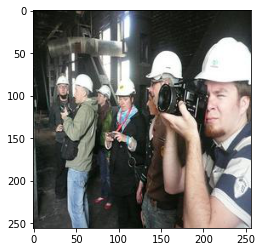

<start> a man in a white shirt and black hat is holding a drink . <end>


In [38]:
import matplotlib.pyplot as plt

# 이미지 및 생성된 캡션(caption) 문장 출력
image = Image.open(image_path)
plt.imshow(np.asarray(image))
plt.show()
print(sentence)

In [29]:
def load_image(image_path, transform=None):
    image = Image.open(image_path).convert('RGB')
    image = image.resize([224, 224], Image.LANCZOS)

    if transform is not None:
        image = transform(image).unsqueeze(0)
    
    return image

image_path = "/content/Flickr8k_dataset/Images/1000268201_693b08cb0e.jpg" # 캡션(caption)을 생성할 입력 이미지
encoder_path = "./nic_encoder_ResNet101.ckpt" # path for trained encoder
decoder_path = "./nic_decoder_ResNet101.ckpt" # path for trained decoder
vocab_path = "./vocab.pkl" # path for vocabulary wrapper

# Model parameters (should be same as paramters in train.py)
embed_size = 256 # dimension of word embedding vectors
hidden_size = 512 # dimension of lstm hidden states
num_layers = 1 # number of layers in lstm

In [30]:
# 이미지 전처리(image preprocessing)
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

# Load vocabulary wrapper
with open(vocab_path, 'rb') as f:
    vocab = pickle.load(f)

# Build models
encoder = EncoderCNN(embed_size).eval() # eval mode (batchnorm uses moving mean/variance)
decoder = DecoderRNN(embed_size, hidden_size, len(vocab), num_layers)
encoder = encoder.to(device)
decoder = decoder.to(device)

# Load the trained model parameters
encoder.load_state_dict(torch.load(encoder_path))
decoder.load_state_dict(torch.load(decoder_path))

# Prepare an image
image = load_image(image_path, transform)
image_tensor = image.to(device)
print('image_tensor: ', image_tensor) # 추가

# Generate an caption from the image
feature = encoder(image_tensor)
print('feature: ', feature) # 추가
sampled_ids = decoder.sample(feature)
print('sample_ids: ', sampled_ids) # 추가함!!
sampled_ids = sampled_ids[0].cpu().numpy() # (1, max_seq_length) -> (max_seq_length)
print('sample_ids: ', sampled_ids) # 추가함!!

# Convert word_ids to words
sampled_caption = []
for word_id in sampled_ids: # 하나씩 단어 인덱스를 확인하며
    word = vocab.idx2word[word_id] # 단어 문자열로 바꾸어 삽입
    print(word) #추가
    sampled_caption.append(word)
    if word == '<end>':
        break
sentence = ' '.join(sampled_caption)

image_tensor:  tensor([[[[-0.7479, -0.1314, -0.0801,  ..., -2.0665, -2.0152, -2.0323],
          [-0.7822, -0.1143,  0.0056,  ..., -1.9809, -2.0152, -1.8953],
          [-0.8164, -0.0458,  0.0569,  ..., -1.9809, -1.9980, -1.9295],
          ...,
          [ 1.0159,  0.1597,  0.4166,  ...,  1.7523,  0.5707,  0.7248],
          [ 0.8618,  0.9303,  1.9578,  ...,  1.7009,  0.6049,  0.7933],
          [ 1.5468,  1.5810,  0.9646,  ...,  1.5639,  0.5878,  0.8104]],

         [[-0.5126,  0.2752,  0.4503,  ..., -2.0007, -1.9307, -1.9307],
          [-0.5826,  0.2927,  0.5553,  ..., -1.8957, -1.8782, -1.6331],
          [-0.6877,  0.3452,  0.6429,  ..., -1.8782, -1.8081, -1.5805],
          ...,
          [-0.2325, -1.0203, -0.3200,  ...,  2.0434,  1.0630,  1.2031],
          [-0.4076,  0.3803,  1.2556,  ...,  1.9734,  1.0455,  1.2031],
          [ 0.2752,  0.7479, -0.0924,  ...,  1.8333,  1.0630,  1.2031]],

         [[-0.1487,  0.4439,  0.5136,  ..., -1.7696, -1.7173, -1.7173],
          [-0.2

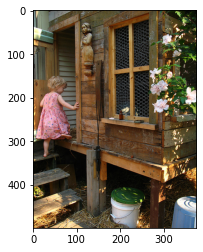

<start> a woman in a white shirt and black pants is sitting on a bench . <end>


In [31]:
import matplotlib.pyplot as plt

# 이미지 및 생성된 캡션(caption) 문장 출력
image = Image.open(image_path)
plt.imshow(np.asarray(image))
plt.show()
print(sentence)

In [32]:
def load_image(image_path, transform=None):
    image = Image.open(image_path).convert('RGB')
    image = image.resize([224, 224], Image.LANCZOS)

    if transform is not None:
        image = transform(image).unsqueeze(0)
    
    return image

image_path = "/content/resized_val/images/3510695264_ef460fa6cc.jpg" # 캡션(caption)을 생성할 입력 이미지
encoder_path = "./nic_encoder_ResNet101.ckpt" # path for trained encoder
decoder_path = "./nic_decoder_ResNet101.ckpt" # path for trained decoder
vocab_path = "./vocab.pkl" # path for vocabulary wrapper

# Model parameters (should be same as paramters in train.py)
embed_size = 256 # dimension of word embedding vectors
hidden_size = 512 # dimension of lstm hidden states
num_layers = 1 # number of layers in lstm

In [33]:
# 이미지 전처리(image preprocessing)
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

# Load vocabulary wrapper
with open(vocab_path, 'rb') as f:
    vocab = pickle.load(f)

# Build models
encoder = EncoderCNN(embed_size).eval() # eval mode (batchnorm uses moving mean/variance)
decoder = DecoderRNN(embed_size, hidden_size, len(vocab), num_layers)
encoder = encoder.to(device)
decoder = decoder.to(device)

# Load the trained model parameters
encoder.load_state_dict(torch.load(encoder_path))
decoder.load_state_dict(torch.load(decoder_path))

# Prepare an image
image = load_image(image_path, transform)
image_tensor = image.to(device)
print('image_tensor: ', image_tensor) # 추가

# Generate an caption from the image
feature = encoder(image_tensor)
print('feature: ', feature) # 추가
sampled_ids = decoder.sample(feature)
print('sample_ids: ', sampled_ids) # 추가함!!
sampled_ids = sampled_ids[0].cpu().numpy() # (1, max_seq_length) -> (max_seq_length)
print('sample_ids: ', sampled_ids) # 추가함!!

# Convert word_ids to words
sampled_caption = []
for word_id in sampled_ids: # 하나씩 단어 인덱스를 확인하며
    word = vocab.idx2word[word_id] # 단어 문자열로 바꾸어 삽입
    print(word) #추가
    sampled_caption.append(word)
    if word == '<end>':
        break
sentence = ' '.join(sampled_caption)

image_tensor:  tensor([[[[-1.8953, -1.8439, -1.8782,  ..., -1.7240, -1.7412, -1.7583],
          [-1.9124, -1.8782, -1.8782,  ..., -1.7069, -1.7412, -1.7583],
          [-1.9638, -1.9295, -1.9124,  ..., -1.7069, -1.7412, -1.7412],
          ...,
          [-1.3130, -1.3473, -1.2788,  ...,  0.6906,  1.4440,  1.1872],
          [-1.3815, -1.4329, -1.3987,  ..., -0.0629,  1.1187,  1.2214],
          [-1.3815, -1.4843, -1.4329,  ...,  1.1872,  0.6049,  1.4098]],

         [[-1.7731, -1.7206, -1.7556,  ..., -1.5980, -1.6155, -1.6331],
          [-1.7906, -1.7556, -1.7556,  ..., -1.5805, -1.6155, -1.6331],
          [-1.8431, -1.8081, -1.7906,  ..., -1.5805, -1.6155, -1.6155],
          ...,
          [-1.1779, -1.2129, -1.1429,  ...,  0.8704,  1.6057,  1.3431],
          [-1.2479, -1.3004, -1.2654,  ...,  0.1001,  1.2556,  1.3606],
          [-1.2479, -1.3529, -1.3004,  ...,  1.3782,  0.7129,  1.5532]],

         [[-1.6302, -1.5779, -1.6127,  ..., -1.4559, -1.4733, -1.4907],
          [-1.6

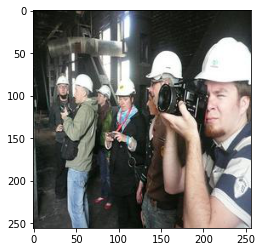

<start> a man in a white shirt and black hat is holding a drink . <end>


In [34]:
import matplotlib.pyplot as plt

# 이미지 및 생성된 캡션(caption) 문장 출력
image = Image.open(image_path)
plt.imshow(np.asarray(image))
plt.show()
print(sentence)

**BLEU Score 계산**

테스트(test) 데이터셋을 이용해 BLEU 점수를 계산

In [37]:
predictions = []
answers = []
answers_per_image = []

total_step = len(test_data_loader)
cnt = 0

with torch.no_grad():
    for i, (images, captions, lengths) in enumerate(test_data_loader):
        images = images.to(device)
        captions = captions.to(device)

        # 순전파(forward) 진행
        features = encoder(images)
        print('feature: ', features) # 추가, 추출된 feature 출력
        sampled_ids_list = decoder.sample(features)
        print('sampled_ids_list: ', sampled_ids_list) # 추가, sampled_ids_list 출력

        for index in range(len(images)):
            sampled_ids = sampled_ids_list[index].cpu().numpy()

            # 정답 문장(answer sentences)
            answer = []
            for word_id in captions[index]: # 하나씩 단어 인덱스를 확인하며
                word = vocab.idx2word[word_id.item()] # 단어 문자열로 바꾸어 삽입
                answer.append(word)
                if word == '<end>':
                    break
            answers_per_image.append(answer[1:-1]) # 정답 문장을 삽입 (<sos>과 <eos>는 제외)

            if (cnt + 1) % 5 == 0: # 이미지당 캡션이 5개씩 존재
                answers.append(answers_per_image) # 5개를 한꺼번에 리스트로 삽입
                answers_per_image = []

                # 예측한 문장(predicted sentences)
                prediction = []
                for word_id in sampled_ids: # 하나씩 단어 인덱스를 확인하며
                    word = vocab.idx2word[word_id] # 단어 문자열로 바꾸어 삽입
                    prediction.append(word)
                    if word == '<end>':
                        break
                predictions.append(prediction[1:-1]) # 예측한 문장에 대해서는 1개만 삽입 (<sos>과 <eos>는 제외)
                print('prediction: ', prediction) #추가, 예측 문장 출력
            cnt += 1

        if i % log_step == 0:
            print(f"[ Testing ] Batch size: {i}/{total_step}")

feature:  tensor([[-2.7393,  3.1361, -0.9230,  ..., -0.1758,  3.1032,  0.8517],
        [-2.7393,  3.1361, -0.9230,  ..., -0.1758,  3.1032,  0.8517],
        [-2.7393,  3.1361, -0.9230,  ..., -0.1758,  3.1032,  0.8517],
        ...,
        [-3.7036,  0.7357,  0.0987,  ...,  0.8620,  0.8414,  0.5440],
        [-3.7036,  0.7357,  0.0987,  ...,  0.8620,  0.8414,  0.5440],
        [-3.7036,  0.7357,  0.0987,  ...,  0.8620,  0.8414,  0.5440]],
       device='cuda:0')
sampled_ids_list:  tensor([[ 1,  4, 74,  ...,  2,  2, 17],
        [ 1,  4, 74,  ...,  2,  2, 17],
        [ 1,  4, 74,  ...,  2,  2, 17],
        ...,
        [ 1,  4, 76,  ..., 76,  6,  4],
        [ 1,  4, 76,  ..., 76,  6,  4],
        [ 1,  4, 76,  ..., 76,  6,  4]], device='cuda:0')
prediction:  ['<start>', 'a', 'young', 'boy', 'wearing', 'a', 'red', 'shirt', 'is', 'playing', 'with', 'a', 'soccer', 'ball', '.', '<end>']
prediction:  ['<start>', 'a', 'group', 'of', 'people', 'are', 'standing', 'in', 'front', 'of', 'a', 'l

In [19]:
print("예측한 문장의 수:", len(predictions))
print("정답 문장 집합의 수 (5개씩):", len(answers))

예측한 문장의 수: 1091
정답 문장 집합의 수 (5개씩): 1091


In [20]:
index = 2                 # 2번째 사진에 대한 캡션 예측
print("[ 정답 캡션들 ]")
for answer in answers[index]:
    print(answer)

print("[ 예측된 캡션 ]")
print(predictions[index])

[ 정답 캡션들 ]
['a', 'brown', 'and', 'white', 'dog', 'is', 'playing', 'with', 'a', 'toy', 'in', 'a', 'field', 'of', 'green', 'grass', 'and', 'clover', '.']
['a', 'brown', 'and', 'white', 'dog', 'retrieving', 'a', 'white', 'plushie', 'toy', 'in', 'a', 'field', 'of', 'clover', '.']
['a', 'distorted', 'photo', 'of', 'a', 'playing', 'dog', 'in', 'a', 'flower', 'field']
['a', 'dog', 'in', 'grass', 'carrying', 'a', 'toy', 'in', 'its', 'mouth', '.']
['the', 'little', 'brown', 'dog', 'is', 'running', 'through', 'a', 'clover', 'field', 'with', 'a', 'white', 'object', 'in', 'its', 'mouth', '.']
[ 예측된 캡션 ]
['a', 'dog', 'runs', 'through', 'the', 'grass', '.']


In [21]:
from torchtext.data.metrics import bleu_score

bleu = bleu_score(predictions, answers, max_n=4, weights=[0.25, 0.25, 0.25, 0.25])
print(f'Total BLEU Score = {bleu * 100:.2f}')

individual_bleu1_score = bleu_score(predictions, answers, max_n=4, weights=[1, 0, 0, 0])
individual_bleu2_score = bleu_score(predictions, answers, max_n=4, weights=[0, 1, 0, 0])
individual_bleu3_score = bleu_score(predictions, answers, max_n=4, weights=[0, 0, 1, 0])
individual_bleu4_score = bleu_score(predictions, answers, max_n=4, weights=[0, 0, 0, 1])

print(f'Individual BLEU1 score = {individual_bleu1_score * 100:.2f}') 
print(f'Individual BLEU2 score = {individual_bleu2_score * 100:.2f}') 
print(f'Individual BLEU3 score = {individual_bleu3_score * 100:.2f}') 
print(f'Individual BLEU4 score = {individual_bleu4_score * 100:.2f}') 

cumulative_bleu1_score = bleu_score(predictions, answers, max_n=4, weights=[1, 0, 0, 0])
cumulative_bleu2_score = bleu_score(predictions, answers, max_n=4, weights=[1/2, 1/2, 0, 0])
cumulative_bleu3_score = bleu_score(predictions, answers, max_n=4, weights=[1/3, 1/3, 1/3, 0])
cumulative_bleu4_score = bleu_score(predictions, answers, max_n=4, weights=[1/4, 1/4, 1/4, 1/4])

print(f'Cumulative BLEU1 score = {cumulative_bleu1_score * 100:.2f}') 
print(f'Cumulative BLEU2 score = {cumulative_bleu2_score * 100:.2f}') 
print(f'Cumulative BLEU3 score = {cumulative_bleu3_score * 100:.2f}') 
print(f'Cumulative BLEU4 score = {cumulative_bleu4_score * 100:.2f}')

Total BLEU Score = 16.99
Individual BLEU1 score = 60.54
Individual BLEU2 score = 25.05
Individual BLEU3 score = 10.93
Individual BLEU4 score = 5.02
Cumulative BLEU1 score = 60.54
Cumulative BLEU2 score = 38.94
Cumulative BLEU3 score = 25.50
Cumulative BLEU4 score = 16.99
